<a href="https://colab.research.google.com/github/anirudhjaju/User-car-Price-Prediction/blob/main/Used_car_pred_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('Used car.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df=df.drop('name',axis=1)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df['current year']=2021
df['no. years']=df['current year']-df['year']
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current year,no. years
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2021,14
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2021,14
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2021,9
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2021,4
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2021,7


In [ ]:
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
current year     0
no. years        0
dtype: int64

In [ ]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,year,selling_price,km_driven,current year,no. years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,2021,14,0,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000,2021,14,0,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,2021,9,1,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,2021,4,0,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,2021,7,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
df['fuel_Diesel'].unique()

array([0, 1], dtype=uint8)

In [ ]:
df_new=df.drop('year',axis=1)
df_new.head()

,selling_price,km_driven,current year,no. years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,2021,14,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,2021,14,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,2021,9,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,2021,4,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,2021,7,1,0,0,0,1,0,1,0,1,0,0


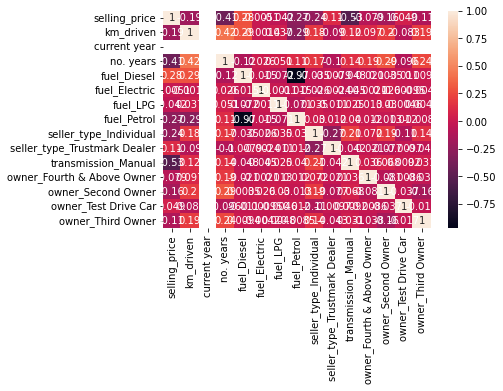

In [ ]:
import seaborn as sns
corr=df_new.corr()
sns.heatmap(corr,annot=True)

In [ ]:
df_new.to_csv('Car_dataset')

In [ ]:
X=df_new.iloc[:,1:]
X.head()

,km_driven,current year,no. years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,2021,14,0,0,0,1,1,0,1,0,0,0,0
1,50000,2021,14,0,0,0,1,1,0,1,0,0,0,0
2,100000,2021,9,1,0,0,0,1,0,1,0,0,0,0
3,46000,2021,4,0,0,0,1,1,0,1,0,0,0,0
4,141000,2021,7,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
Y=df_new.iloc[:,0]
Y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [ ]:

import sklearn
from sklearn.ensemble import ExtraTreesRegressor
Model=ExtraTreesRegressor()
Model.fit(X,Y)
print(Model.feature_importances_)

[2.45461456e-01 0.00000000e+00 2.46551652e-01 1.30052588e-01
 2.20780188e-05 2.55149368e-05 2.20526885e-04 4.80932959e-02
 8.40579416e-03 2.92839402e-01 8.18679039e-04 2.21242050e-02
 5.72561557e-04 4.81224771e-03]


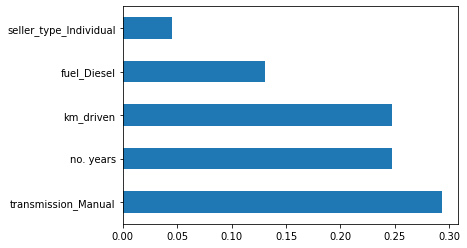

In [ ]:
feat_imp=pd.Series(Model.feature_importances_,index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.47,random_state=4)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(Xtrain,Ytrain)
Y_predict=model.predict(Xtest)
Y_predict
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Ytest,Y_predict)) 
print('MSE:', metrics.mean_squared_error(Ytest,Y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest,Y_predict)))
R2=metrics.r2_score(Ytest,Y_predict)
R2

MAE: 227864.6166505265
MSE: 143414838309.3254
RMSE: 378701.5161170145


0.47104086627676434

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Ytest,Y_predict)) 
print('MSE:', metrics.mean_squared_error(Ytest,Y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest,Y_predict)))
R2=metrics.r2_score(Ytest,Y_predict)
R2

MAE: 227864.6166505265
MSE: 143414838309.3254
RMSE: 378701.5161170145


0.47104086627676434

In [ ]:
from sklearn.ensemble import RandomForestRegressor
re=RandomForestRegressor(n_estimators=100,random_state=43)
re.fit(Xtrain,Ytrain)
ypred=re.predict(Xtest)
ypred
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Ytest,ypred)) 
print('MSE:', metrics.mean_squared_error(Ytest,ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest,ypred)))
R2=metrics.r2_score(Ytest,ypred)
R2

MAE: 169581.218535964
MSE: 106735772038.93326
RMSE: 326704.4108042211


0.6063248253767077

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(Xtrain,Ytrain)
yp=tree.predict(Xtest)
print(yp)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Ytest,yp)) 
print('MSE:', metrics.mean_squared_error(Ytest,yp))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest,yp)))
R2=metrics.r2_score(Ytest,yp)
R2

[246666.66666667 804666.66666667  60000.         ... 200000.
 195000.         875000.        ]
MAE: 184414.0706152739
MSE: 164464403452.55087
RMSE: 405542.1105786067


0.39340343437173286

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Ytest,Y_predict)) 
print('MSE:', metrics.mean_squared_error(Ytest,Y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest,Y_predict)))
R2=metrics.r2_score(Ytest,Y_predict)
R2

MAE: 227864.6166505265
MSE: 143414838309.3254
RMSE: 378701.5161170145


0.47104086627676434

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,16,num=6)]
min_samples_split=[2,5,6,14,100]
min_samples_leaf=[1,2,5,10]

In [ ]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
random_grid

{'max_depth': [5, 7, 9, 11, 13, 16],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 6, 14, 100],
 'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200]}

In [ ]:
re=RandomForestRegressor()

In [ ]:
re_random=RandomizedSearchCV(estimator=re,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv=5,verbose=5,random_state=4,n_jobs=1)

In [ ]:
re_random.fit(Xtrain,Ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=16 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=16, score=-149153988488.417, total=   2.5s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=16 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=16, score=-138306493510.943, total=   2.5s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=16 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=16, score=-260605220684.303, total=   2.4s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=16 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=16, score=-111165157110.791, total=   2.4s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=16 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=16, score=-83248714961.226, total=   2.4s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=13 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=13, score=-148679812409.579, total=   1.4s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=13 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=13, score=-134005811940.887, total=   1.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=13 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=13, score=-258622297875.360, total=   1.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=13 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, 

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 12.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
re_random.best_score_

-140250605671.44632

In [ ]:
ypre=re_random.predict(Xtest)
ypre

array([369804.44430406, 870774.5082067 ,  94983.77395781, ...,
       240813.84735716, 242326.92519114, 936588.56343119])

In [ ]:
re_random.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

In [ ]:
import pickle
file=open('car_price_model.pkl','wb')
pickle.dump(re_random,file)